Previously, I discussed and build Gradient Boosting Regressor using python.

It is recommended to [checkout](https://github.com/nikitaprasad21/ML-Cheat-Codes/blob/main/Voting-Ensemble/gradient_boosting_regressor.ipynb) that article for better understanding if you haven't till now.

Now , let’s get started!

In this article, I would like to discuss how Gradient Boosting works for Classification.

# What is Gradient Boosting Classifier?

The name coined as Gradient Boosting because each new model takes a step in the direction that minimizes prediction error wrt Target Column, in the space of possible predictions for each training case.

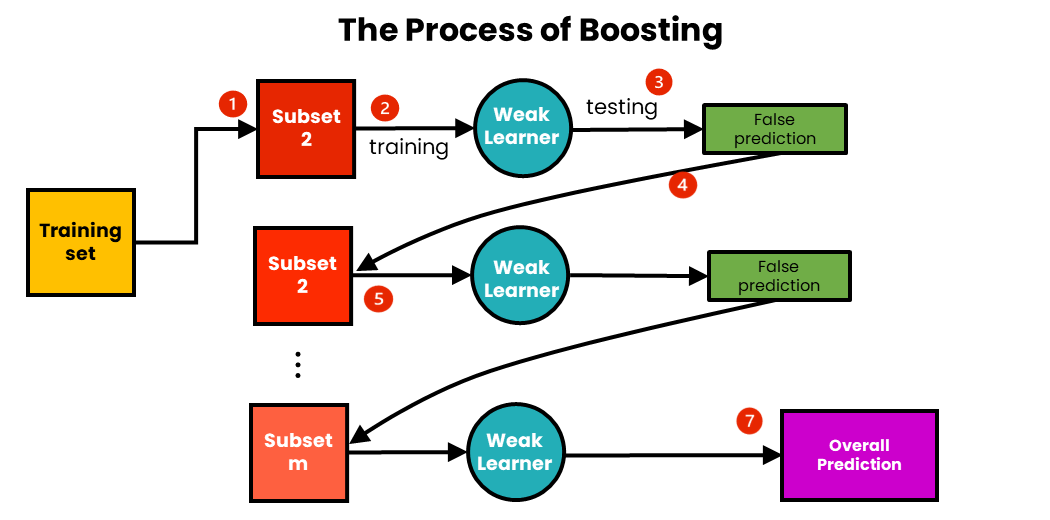

### **Components of Gradient Boosting Classifier:**

- **Loss Function**: Determines how well the model fits the data and guides the optimization process. Common loss functions for classification include cross-entropy loss and exponential loss.
- **Base Learner**: Typically decision trees, although other models can also be used. Each tree makes predictions on the residuals of the previous trees.
- **Gradient Descent**: The optimization algorithm used to minimize the loss function by adjusting the parameters of the weak learners.
- **Learning Rate**: Controls the contribution of each weak learner to the final ensemble. Lower learning rates require more weak learners but can lead to better generalization.
- **Regularization**: Techniques like shrinkage (reducing the contribution of each weak learner) and tree pruning (limiting the depth or complexity of the trees) help prevent overfitting.
- **Stopping Criteria**: Defines when to stop adding new weak learners to the ensemble. This can be based on the number of iterations, the performance on a validation set, or when the improvement in the loss function becomes negligible.

### Here's a visual representation of Gradient Boosting:

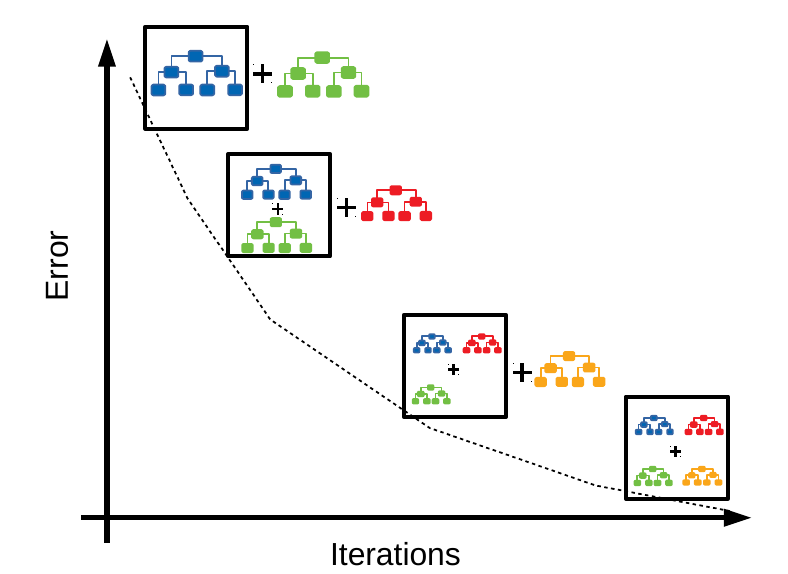

### Implementing Gradient Boosting Classifier in Python

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

In [ ]:
# Generate synthetic dataset with concentric circles
X, y = make_circles(n_samples=200, noise=0.1, random_state=42, factor=0.5)

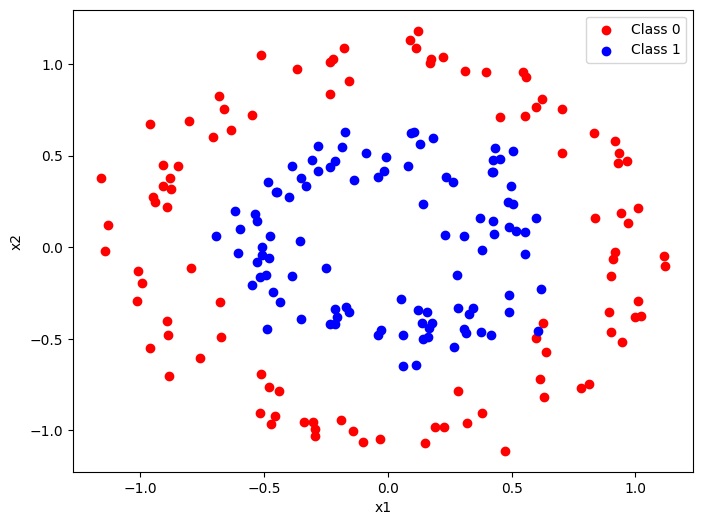

In [ ]:
# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [ ]:
X

## Building our own Gradient Boosting Classifier Class

### Algorithm for Custom Gradient Boosting Classifier:

1. **Initialize Parameters**: Initialize the learning rate, number of estimators, and maximum depth of each decision tree in the ensemble.

2. **Initialize Initial Predictions**: Calculate the initial predictions, **F0**, using the log-odds values of the mean of the target variable. This provides a starting point for the boosting process.

3. **Iterative Training of Decision Trees**:
    - Loop over the specified number of estimators:
        - Calculate the previous probabilities, *prev*_*prob*, using the exponential function to convert the current predictions *Fm* to probabilities.
        - Calculate the residuals by subtracting the previous probabilities from the actual target values.
        - Fit a decision tree regressor to predict the residuals using the input features *X*.
        - Get the terminal node IDs for each sample in *X* using the decision tree.
        - Iterate over unique terminal node IDs:
            - Calculate the gamma value for each terminal node using the formula: ∑residuals/∑*prev*_*prob*×(1−*prev*_*prob*). This represents the improvement in prediction needed for each terminal node.
            - Update the predictions *Fm* for samples in the current terminal node by adding the product of learning rate and gamma.
            - Update the value in the decision tree's node to store the gamma value, which will be used during prediction.
        - Store the trained decision tree in the list of decision trees.

4. **Prediction**:
    - Predict the probabilities for the input samples *X* using the trained ensemble of decision trees.
    - Calculate the final probabilities by applying the exponential function to the updated predictions *Fm* and dividing by the sum of 1+exponential(*Fm*) to convert them back to probabilities.

5. **Return Predictions**: Return the predicted probabilities for each class for the input samples *X*.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import log_loss

In [ ]:
class CustomGradientBoostingClassifier:

    def __init__(self, learning_rate, n_estimators, max_depth=1):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.decison_trees = []

    def fit(self, X, y):

        F0 = np.log(y.mean()/(1-y.mean()))  # log-odds values
        self.F0 = np.full(len(y), F0)  # converting to array with the input length
        Fm = self.F0.copy()

        for _ in range(self.n_estimators):
            prev_prob = np.exp(Fm) / (1 + np.exp(Fm))  # converting back to probabilities
            residual = y - prev_prob  # residuals
            decison_tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=0)
            decison_tree.fit(X, residual)
            ids = decison_tree.apply(X)  # getting the terminal node IDs

            # looping through the terminal nodes
            for j in np.unique(ids):
                node = ids == j

                # getting gamma using the formula (Σresiduals/Σprev_prob(1-prev_prob))
                numerator = residual[node].sum()
                denominator = (prev_prob [node]*(1-prev_prob [node])).sum()
                gamma = numerator / denominator

                # updating the prediction
                Fm[node] += self.learning_rate * gamma

                # replacing the prediction value in the decison_tree
                decison_tree.tree_.value[j, 0, 0] = gamma

            self.trees.append(decison_tree)

    def predict_proba(self, X):

        Fm = self.F0

        for i in range(self.n_estimators):
            Fm += self.learning_rate * self.decison_trees[i].predict(X)
            probability = np.exp(Fm) / (1 + np.exp(Fm)) # converting back into probabilities

        return  probability

In [ ]:
# Example usage:
custom_gbm = CustomGradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=3)
custom_gbm.fit(X, y)
custom_gbm_log_loss = log_loss(y, custom_gbm.predict_proba(X))
print("Custom GBM Log-Loss", custom_gbm_log_loss)

0.1649608595356697

## Gradient Boosting Classification with Scikit-Learn

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
sklearn_gbm = GradientBoostingClassifier(
    n_estimators=20,
    learning_rate=0.1,
    max_depth=3
)
sklearn_gbm.fit(X, y)
y_pred = sklearn_gbm.predict_proba(X)
sklearn_gbm_log_loss = log_loss(y, y_pred)
print("Scikit-learn GBM Log-Loss", sklearn_gbm_log_loss)

Scikit-learn GBM Log-Loss 0.16568826490804456


As you can see in the output above, both models have exactly the same

## Conclusion

The class that we build, uses the **Cross Entropy Loss Function** (one of the options of gradient boosting algorithm) to solve Classification Problems.

**Cross-entropy:** This function measures the difference between two probability distributions, used for classification tasks.

## Let's also see the **Decision Boundary** of dataset.

-- What is Decision Boundary?

 A well-defined boundary that clearly separates the different classes improves the prediction accuracy of the model.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
def plot_decision_boundary(classifier, X, y, title):
    h = .02  # step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)

    plt.show()

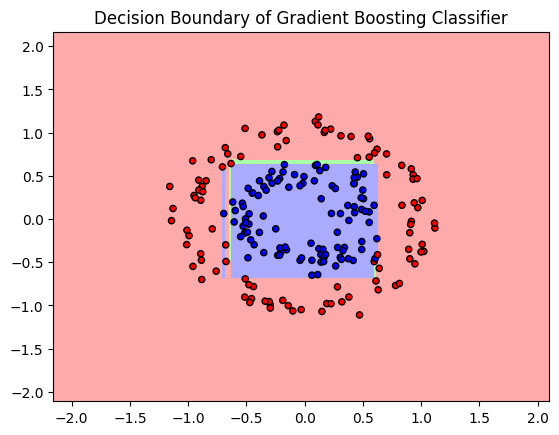

In [ ]:
# Create an instance of GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()

# Fit the classifier
gb_classifier.fit(X, y)

# Plot decision boundary
plot_decision_boundary(gb_classifier, X, y, "Decision Boundary of Gradient Boosting Classifier")


The decision boundary is well-defined, exhibiting a clear classification pattern. Although there is a slight indication of overfitting, given the relatively small size of the dataset, it can be disregarded to appreciate the regions of decision.






Now, let us delve into additional topics for discussion.

1. **Advantages of Gradient Boosting Classifier:**
    - **Excellent predictive performance:** GBC often outperforms other machine learning algorithms on a wide range of datasets.
    - **Handles heterogeneous data:** Can handle a mixture of feature types (numeric, categorical) without requiring extensive preprocessing.
    - **Robust to overfitting:** Regularization techniques and early stopping prevent overfitting, making GBC less prone to memorizing noise in the data.
    - **Feature importance:** GBC provides insights into the importance of features, helping to identify the most relevant predictors.
2. **Disadvantages of Gradient Boosting Classifier:**
    - **Computationally expensive:** Training a GBC model can be computationally intensive, especially for large datasets and complex models.
    - **Tuning parameters:** GBC has several hyperparameters that need to be tuned, such as the learning rate, tree depth, and regularization parameters.
    - **Sensitive to noisy data:** GBC can be sensitive to noisy or outlier-prone datasets, which may affect its performance.
    
3. **Popular Implementations:**
    - **XGBoost - eXtreme Gradient Boosting**: An optimized and scalable implementation of Gradient Boosting.
    - **LightGBM**: A high-performance implementation developed by Microsoft.
    - **CatBoost**: A Gradient Boosting library developed by Yandex, designed to handle categorical features efficiently.

Overall, Gradient Boosting Classifier is a powerful and widely used technique in machine learning, known for its high predictive accuracy and robustness across various domains.

As a beginner, understanding its core principles and experimenting with different hyperparameters will help you effectively apply it to real-world problems.


> Stay tuned for Other Machine Learning Models and Don't forget to **Star** this Github Repository for more such contents and consider **sharing with others**.